# Plotting Spin-up Simulations 

In [1]:
import os 
import sys
import numpy as np 
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

# Local plotting functions
sys.path.append('../SRC/')
from utils import plot_spinup 

# Set global matplotlib style parameters
plt.rcParams.update({'font.size': 14, 
                     'text.usetex': True, 
                     'animation.html': 'jshtml', 
                     'figure.facecolor': 'w'})

# Reference Bed

Read in the grid-search `NetCDF` results and concatenate individual `NetCDF` files along a new dimension for the mass balance offset. 

In [2]:
# Path to the NetCDF results folder 
fp      = '../Synthetic/exp_01_elevation_dependent/hdf5/'
# Glob the file paths and return list of files
files   = sorted([os.path.join(fp,file) for file in os.listdir(fp) if file.endswith('.nc') and 'dx_50' in file])

# Make an empty list to store the read in .nc files
xarrays = []

# Iterate over each .nc file and read in with xarray
for file in files:
    xarrays.append(xr.open_dataset(file))

# Create array of mass balance values used in spin-up
MB = np.arange(1.90, 2.051, 0.01)

# Concatenate the .nc files via their mass balance offset
mf_dataset = xr.concat(xarrays,
                       pd.Index(data = MB, name='Delta_MB'))

# Correct for mimimum thickness
# NOTE:: This shoud have been done in the dat2h5.py file but not sure if it's working
mf_dataset['z_s'] = mf_dataset.z_s.where((mf_dataset.z_s - mf_dataset.z_b) != 10., mf_dataset.z_b)
mf_dataset["H"]   = mf_dataset.z_s - mf_dataset.z_b
# Flip the x-coordinate to more accurately match the map view representation of LK
mf_dataset['x'] = mf_dataset['x'][::-1]

### Relative Volume Plot

Plot the relative volume ($V'$) for each of the mass balance offsets throughout the $ 2 \, \rm{ka}$ spin-up simulations.

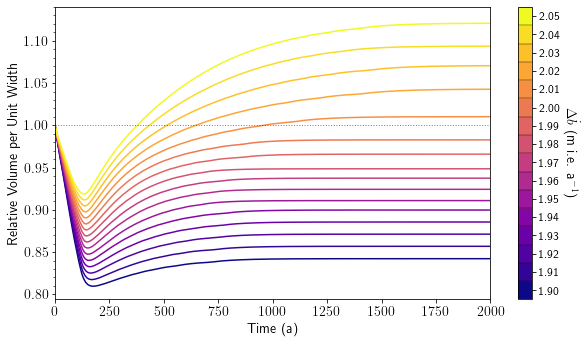

In [3]:
# Call the helper function to plot the relative volume curves 
fig, ax, cbar = plot_spinup.plot_volume(mf_dataset, precision=2, title=None)

# Major ticks every 20, minor ticks every 5
major_ticks = np.arange(0.8, 1.1, 0.05)
minor_ticks = np.arange(0.8, 1.15, 0.01)
ax.set_yticks(major_ticks);
ax.set_yticks(minor_ticks, minor=True);

# Adjust the figure size
fig.set_size_inches(9, 5)

# Adjust colorbar label fontsize 
cbar.ax.tick_params(labelsize='small')

# Save the figure
# fig.savefig('/Users/andrewnolan/Desktop/test.pdf', bbox_inches='tight')

### Free Surface ($z_{\rm s}$) Plot

Plot the final ($t=2 \rm{ ka}$) free surface elevation $z_{\rm s}$ for each of the mass balance offsets. 

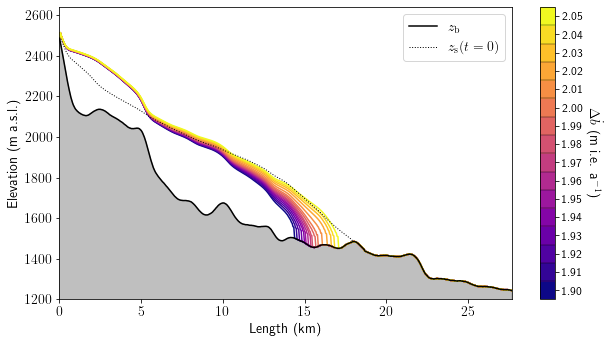

In [4]:
# Call the helper function to plot the free surface curves 
fig, ax, cbar = plot_spinup.plot_final_z_s(mf_dataset, precision=2, title=None)

# Adjust colorbar label fontsize 
cbar.ax.tick_params(labelsize='small')

# Adjust the figure size
fig.set_size_inches(9, 5)

# Save the figure
# fig.savefig('/Users/andrewnolan/Desktop/test.pdf', bbox_inches='tight')

### Convergence Plots  

Plot the final ($t=2 \rm{ ka}$) free surface elevation $z_{\rm s}$ for each of the mass balance offsets. 

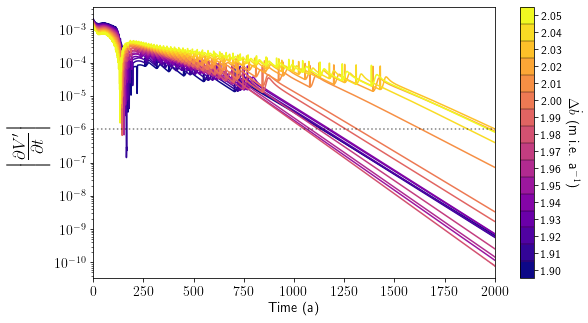

In [5]:
# Call the helper function to plot the dVdt convergence curves 
fig, ax, cbar = plot_spinup.plot_convergence(mf_dataset, precision=2, title=None)

# Adjust colorbar label fontsize 
cbar.ax.tick_params(labelsize='small')

# Adjust the figure size
fig.set_size_inches(9, 5)

# Save the figure
# fig.savefig('/Users/andrewnolan/Desktop/test.pdf', bbox_inches='tight')

### Animate Steady-State Spinup

Animate the free surface $z_{\rm s}$ for mass balance offset which result in our steady-state configuration. 

In [6]:
# Call helper function to animate the free surface throughout the spin-up period
anim = plot_spinup.animate_z_s(mf_dataset.isel(Delta_MB=11), 
                               stride=10, 
                               figsize=(9,4), 
                               title=None);

# Display the animation
anim

# Perturbed Beds